<a href="https://colab.research.google.com/github/MalaikaJunaid/AI-Chatbot/blob/main/Diabetes-Dataipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries:

In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import skew, kurtosis, norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Loading Datasets:

In [6]:
#Training Data
data = pd.read_csv('/content/diabetes-training.csv')

#Testing Data
test_data = pd.read_csv('/content/diabetes-testing-no-class-info.csv')



Exploring Training Dataset

In [7]:
data.head()

,patient (P)\nnumber,cholesterol (C ),gender (G),height (H)\n(inches),weight (W)\n(pounds),diabetes (D)\n1:diab\n0Nodiab,Observation
0,290,289,male,68,169,1,1
1,201,191,female,67,151,0,2
2,294,235,male,69,186,0,3
3,316,212,male,70,161,0,3
4,332,170,male,69,182,0,3


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   patient (P)
number           312 non-null    int64 
 1   cholesterol (C )             312 non-null    int64 
 2   gender (G)                   312 non-null    object
 3   height (H)
(inches)          312 non-null    int64 
 4   weight (W)
(pounds)          312 non-null    int64 
 5   diabetes (D)
1:diab
0Nodiab  312 non-null    int64 
 6   Observation                  312 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.2+ KB


In [9]:
print(data.columns)


Index(['patient (P)\nnumber', 'cholesterol (C )', 'gender (G)',
       'height (H)\n(inches)', 'weight (W)\n(pounds)',
       'diabetes (D)\n1:diab\n0Nodiab', 'Observation'],
      dtype='object')


In [10]:
data.shape

(312, 7)

In [11]:
data.describe()

,patient (P)\nnumber,cholesterol (C ),height (H)\n(inches),weight (W)\n(pounds),diabetes (D)\n1:diab\n0Nodiab,Observation
count,312.00000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,196.38141,206.628205,65.996795,175.875000,0.160256,158.852564
std,113.17510,44.924333,3.988326,39.367594,0.367433,96.823026
min,1.00000,78.000000,52.000000,100.000000,0.000000,1.000000
25%,98.75000,177.750000,63.000000,147.750000,0.000000,66.000000
50%,197.50000,203.000000,66.000000,170.000000,0.000000,161.500000
75%,288.25000,228.000000,69.000000,200.000000,0.000000,245.250000
max,390.00000,443.000000,76.000000,325.000000,1.000000,317.000000


In [12]:
data.count()

,0
patient (P)\nnumber,312
cholesterol (C ),312
gender (G),312
height (H)\n(inches),312
weight (W)\n(pounds),312
diabetes (D)\n1:diab\n0Nodiab,312
Observation,312


Cleaning Training Dataset:

In [13]:
data.columns = data.columns.str.replace(' ', '').str.replace('(', '').str.replace(')', '')

In [14]:
# Renaming columns for easier access
data.columns = [
    'Patient_Number',  # 'patient (P)\nnumber'
    'Cholesterol',     # 'cholesterol (C )'
    'Gender',          # 'gender (G)'
    'Height',          # 'height (H)\n(inches)'
    'Weight',          # 'weight (W)\n(pounds)'
    'Diabetes',        # 'diabetes (D)\n1:diab\n0Nodiab'
    'Observation'      # 'Observation'
]

# Display first few rows to verify changes
data.head()


,Patient_Number,Cholesterol,Gender,Height,Weight,Diabetes,Observation
0,290,289,male,68,169,1,1
1,201,191,female,67,151,0,2
2,294,235,male,69,186,0,3
3,316,212,male,70,161,0,3
4,332,170,male,69,182,0,3


In [15]:
data.nunique()

,0
Patient_Number,312
Cholesterol,138
Gender,2
Height,22
Weight,127
Diabetes,2
Observation,199


In [16]:
data.isnull().sum()

,0
Patient_Number,0
Cholesterol,0
Gender,0
Height,0
Weight,0
Diabetes,0
Observation,0


In [17]:
data.fillna('No', inplace=True)

In [18]:
data.duplicated().sum()

0

Preparing Dataset

In [27]:
male_data = data[data['Gender'].str.lower() == 'male']
female_data = data[data['Gender'].str.lower() == 'female']


In [28]:
pairs = [('Cholesterol', 'Weight'), ('Cholesterol', 'Height'), ('Weight', 'Height')]


1.	Plot the histograms of C, W,  and H and normalize as a PMFs


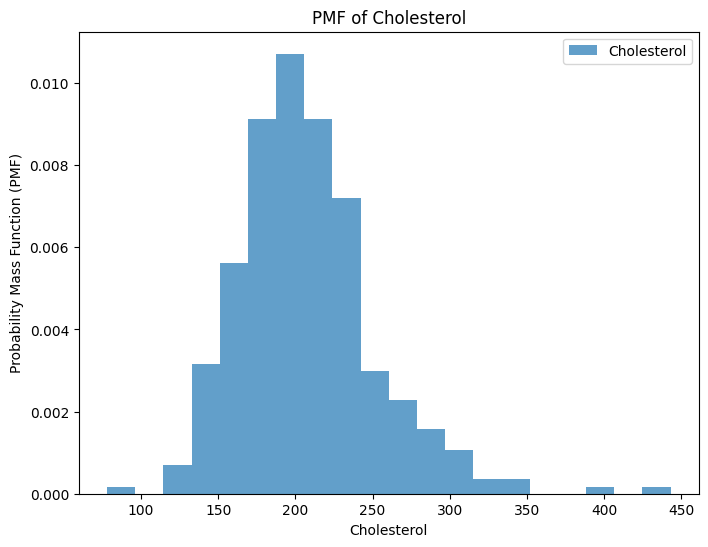

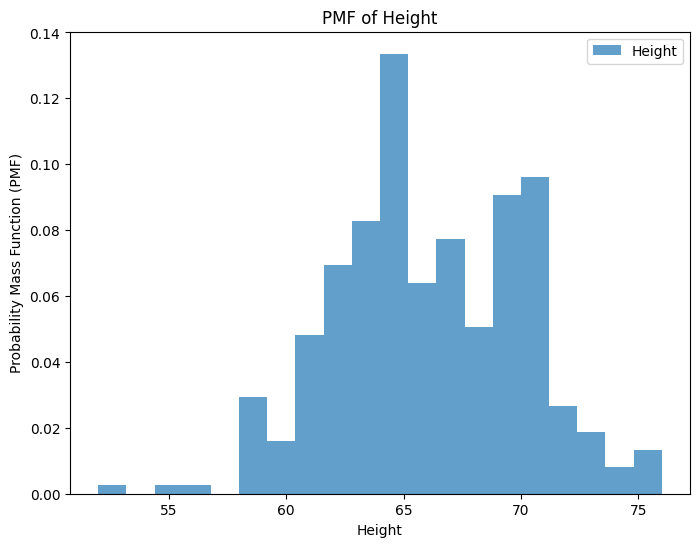

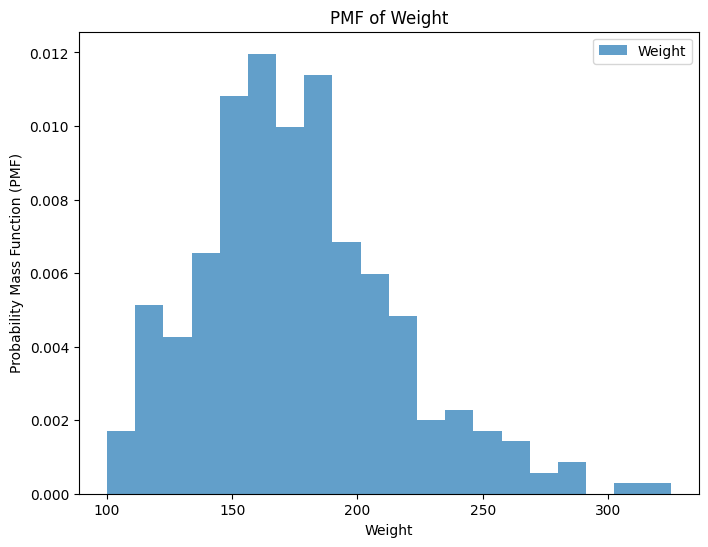

In [19]:
for column in ['Cholesterol', 'Height', 'Weight']:
  plt.figure(figsize=(8, 6))

  plt.hist(data[column], bins=20, density=True, alpha=0.7, label=column)
  plt.xlabel(column)
  plt.ylabel('Probability Mass Function (PMF)')
  plt.title(f'PMF of {column}')
  plt.legend()
  plt.show()

In [20]:
# Display the first few rows to check data structure and types
print(data.head())
print(data.info())


   Patient_Number  Cholesterol  Gender  Height  Weight  Diabetes  Observation
0             290          289    male      68     169         1            1
1             201          191  female      67     151         0            2
2             294          235    male      69     186         0            3
3             316          212    male      70     161         0            3
4             332          170    male      69     182         0            3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_Number  312 non-null    int64 
 1   Cholesterol     312 non-null    int64 
 2   Gender          312 non-null    object
 3   Height          312 non-null    int64 
 4   Weight          312 non-null    int64 
 5   Diabetes        312 non-null    int64 
 6   Observation     312 non-null    int64 
dtypes: int64(6), object(1)
memo

2.	Plot the CDFs for C, W,  and H.


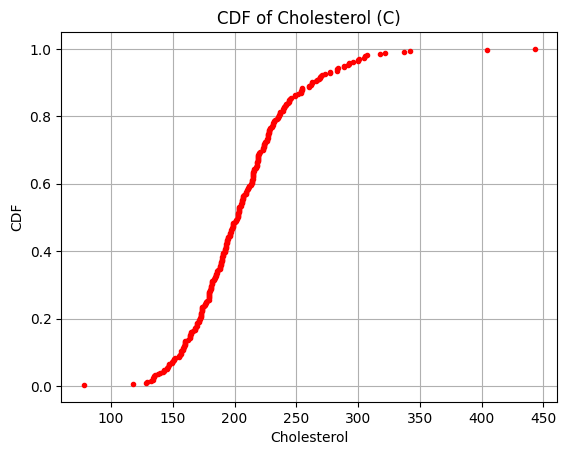

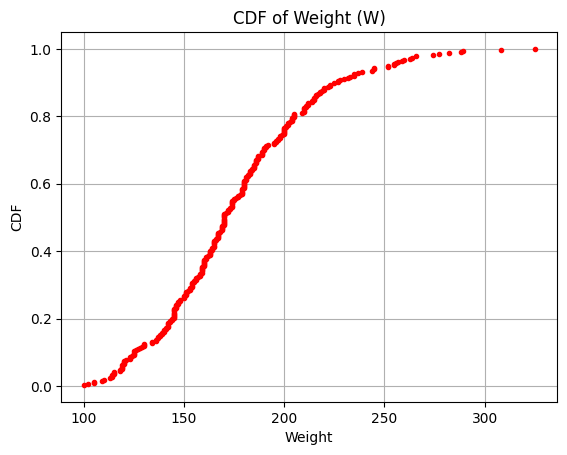

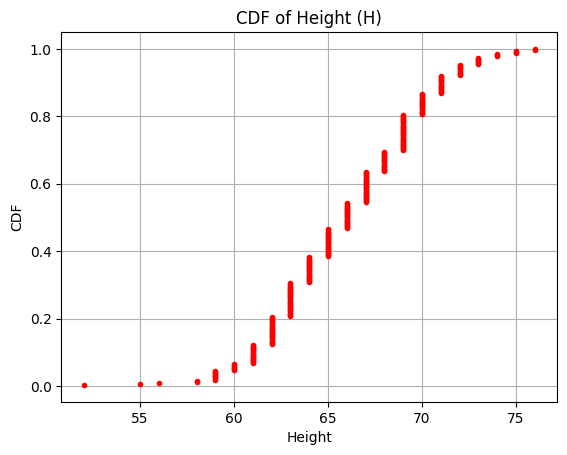

In [21]:

def plot_cdf(data, column, title):
    sorted_data = np.sort(data[column])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='red')
    plt.title(f'CDF of {title}')
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.grid(True)
    plt.show()

# Plot CDFs for Cholesterol (C), Weight (W), and Height (H)
plot_cdf(data, 'Cholesterol', 'Cholesterol (C)')
plot_cdf(data, 'Weight', 'Weight (W)')
plot_cdf(data, 'Height', 'Height (H)')


3. Change the bin width of the histograms and discuss its effect


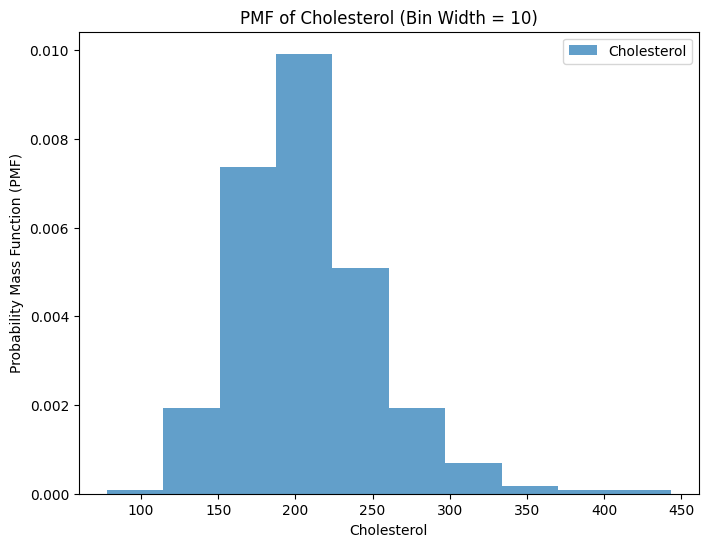

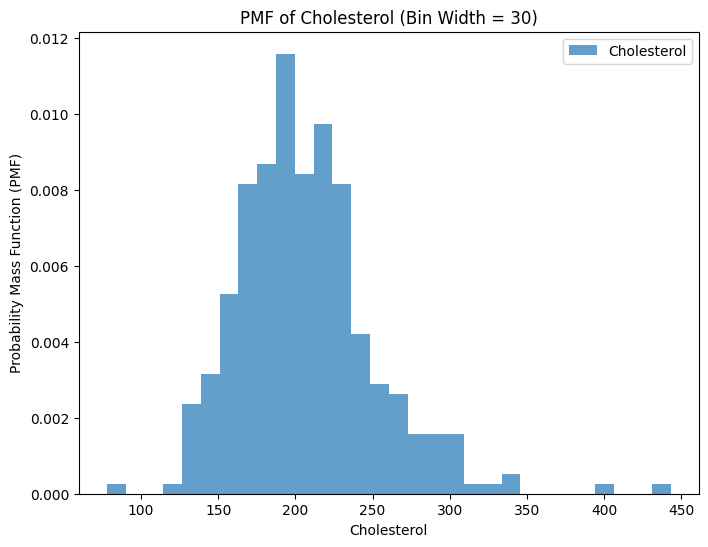

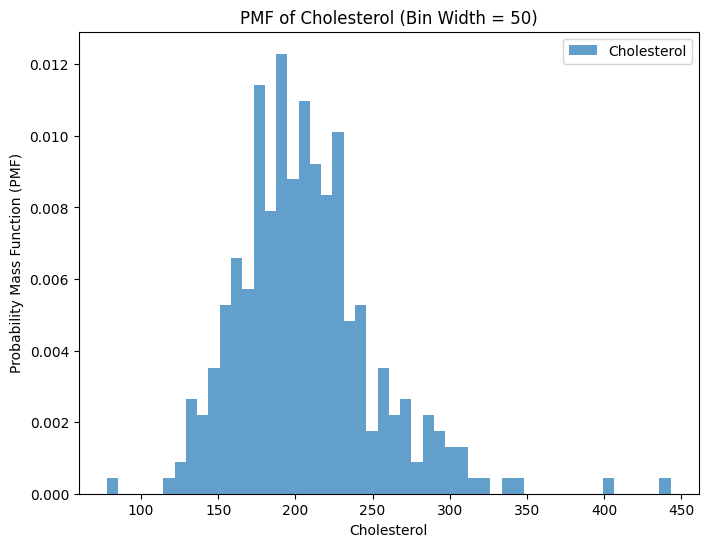

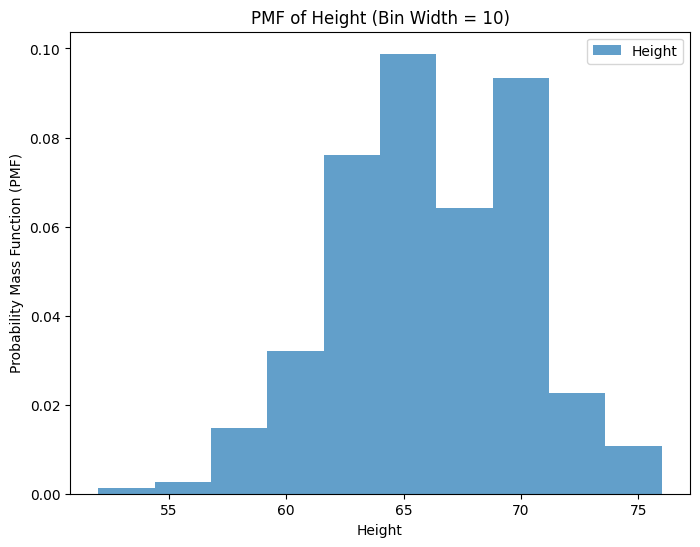

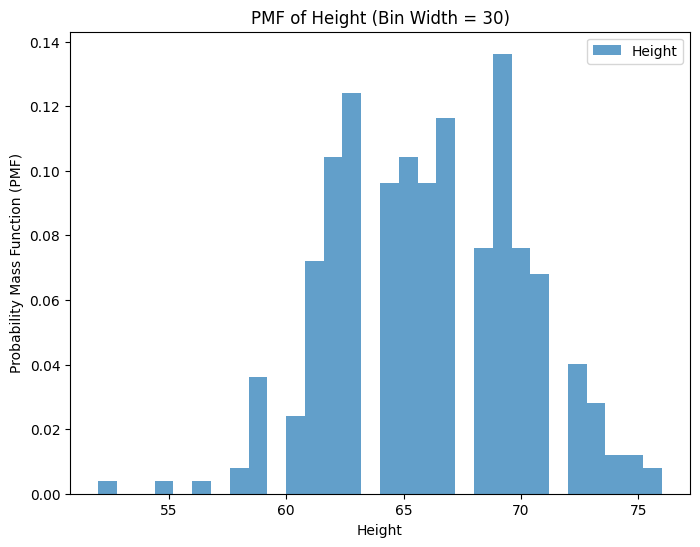

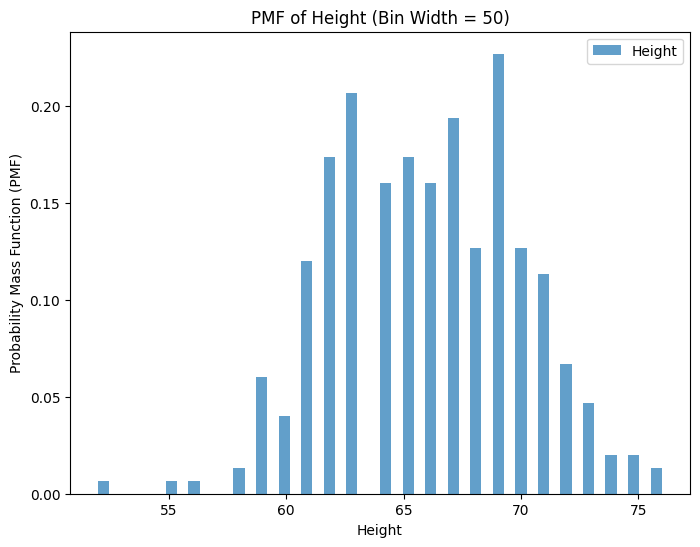

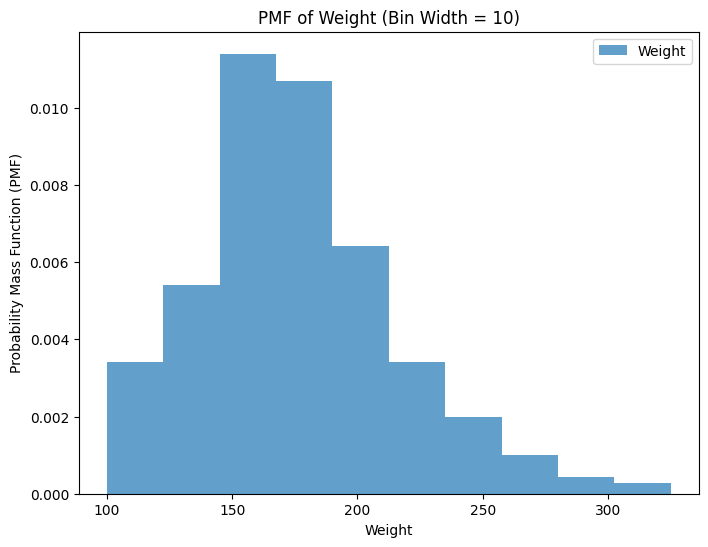

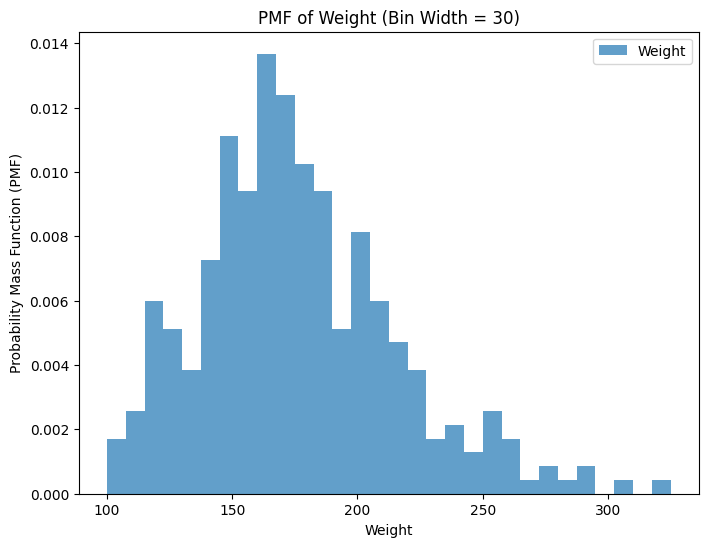

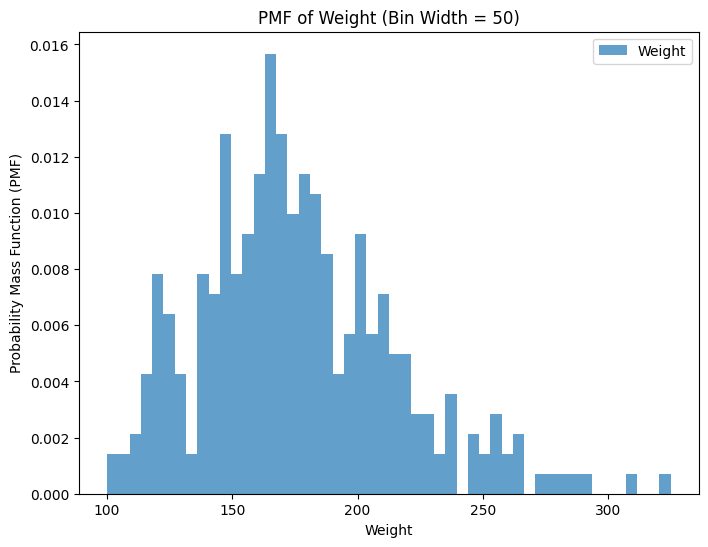

In [22]:

for column in ['Cholesterol', 'Height', 'Weight']:
  plt.figure(figsize=(8, 6))

  plt.hist(data[column], bins=10, density=True, alpha=0.7, label=column)
  plt.xlabel(column)
  plt.ylabel('Probability Mass Function (PMF)')
  plt.title(f'PMF of {column} (Bin Width = 10)')
  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.hist(data[column], bins=30, density=True, alpha=0.7, label=column)
  plt.xlabel(column)
  plt.ylabel('Probability Mass Function (PMF)')
  plt.title(f'PMF of {column} (Bin Width = 30)')
  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.hist(data[column], bins=50, density=True, alpha=0.7, label=column)
  plt.xlabel(column)
  plt.ylabel('Probability Mass Function (PMF)')
  plt.title(f'PMF of {column} (Bin Width = 50)')
  plt.legend()
  plt.show()




# Discussion:
# 1. Smaller bin width: More detailed view of the distribution, but might
#    lead to more variability and noise in the histogram.
# 2. Larger bin width: Smoother histogram, but may lose some details about
#    the fine structure of the distribution.
# 3. The optimal bin width depends on the data and the specific analysis
#    being conducted. we want to find a balance between capturing
#    details and avoiding excessive noise.

4. Determine mean, variance, skewness, and kurtosis for C, W, and H


In [23]:

for col in ['Cholesterol', 'Weight', 'Height']:
    print(f"Statistics for {col}:")
    print(f"  Mean: {data[col].mean()}")
    print(f"  Variance: {data[col].var()}")
    print(f"  Skewness: {skew(data[col])}")
    print(f"  Kurtosis: {kurtosis(data[col])}")
    print("-" * 20)

Statistics for Cholesterol:
  Mean: 206.62820512820514
  Variance: 2018.1957292439588
  Skewness: 1.0890719920763148
  Kurtosis: 3.178283350029454
--------------------
Statistics for Weight:
  Mean: 175.875
  Variance: 1549.8074758842445
  Skewness: 0.7164853636905067
  Kurtosis: 0.6937509579229806
--------------------
Statistics for Height:
  Mean: 65.99679487179488
  Variance: 15.906742105697084
  Skewness: -0.034491438439809764
  Kurtosis: -0.17273661591413303
--------------------


5. Plot over the top of the histograms, the theoretical Gaussian approximation models

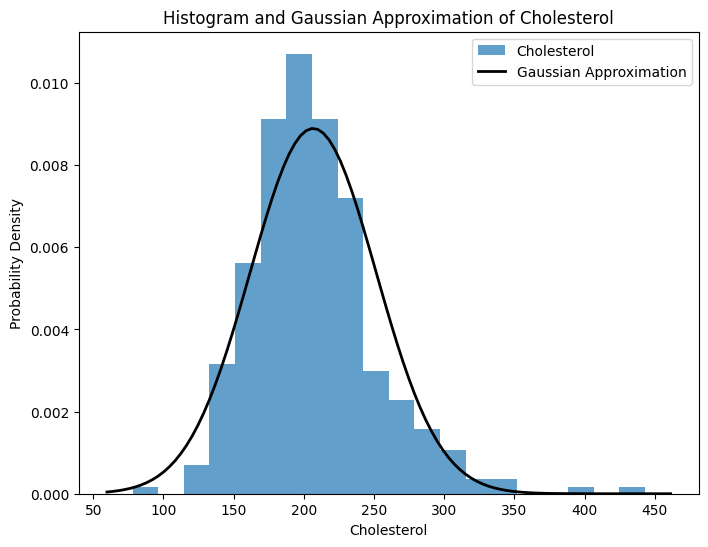

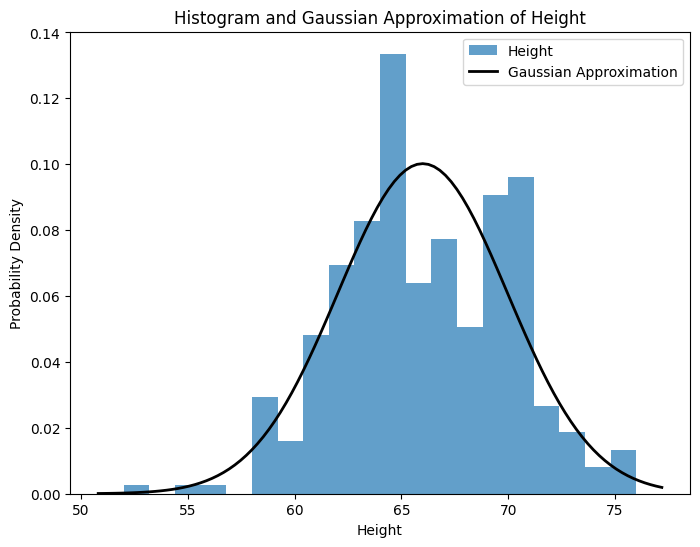

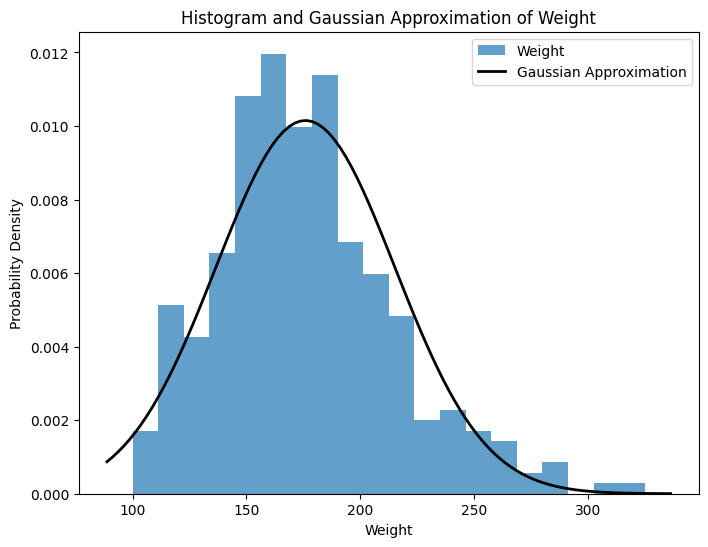

In [24]:


# Assuming 'data' and other necessary variables are defined from previous code

for column in ['Cholesterol', 'Height', 'Weight']:
    plt.figure(figsize=(8, 6))

    # Plot the histogram
    plt.hist(data[column], bins=20, density=True, alpha=0.7, label=column)

    # Calculate mean and standard deviation
    mu, std = norm.fit(data[column])

    # Plot the Gaussian approximation
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian Approximation')

    plt.xlabel(column)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and Gaussian Approximation of {column}')
    plt.legend()
    plt.show()

6. Determine the correlation, the covariance, and the correlation coefficient between C&W, C&H, W&H.

In [29]:
# Perform correlation and covariance calculations
for col1, col2 in pairs:
    correlation = data[col1].corr(data[col2])  # Correlation coefficient
    covariance = data[[col1, col2]].cov().iloc[0, 1]  # Covariance

    # Display results
    print(f"\nAnalysis for {col1} & {col2}:")
    print(f"  Correlation Coefficient: {correlation:.3f}")
    print(f"  Covariance: {covariance:.3f}")


Analysis for Cholesterol & Weight:
  Correlation Coefficient: 0.013
  Covariance: 23.526

Analysis for Cholesterol & Height:
  Correlation Coefficient: -0.071
  Covariance: -12.705

Analysis for Weight & Height:
  Correlation Coefficient: 0.240
  Covariance: 37.604


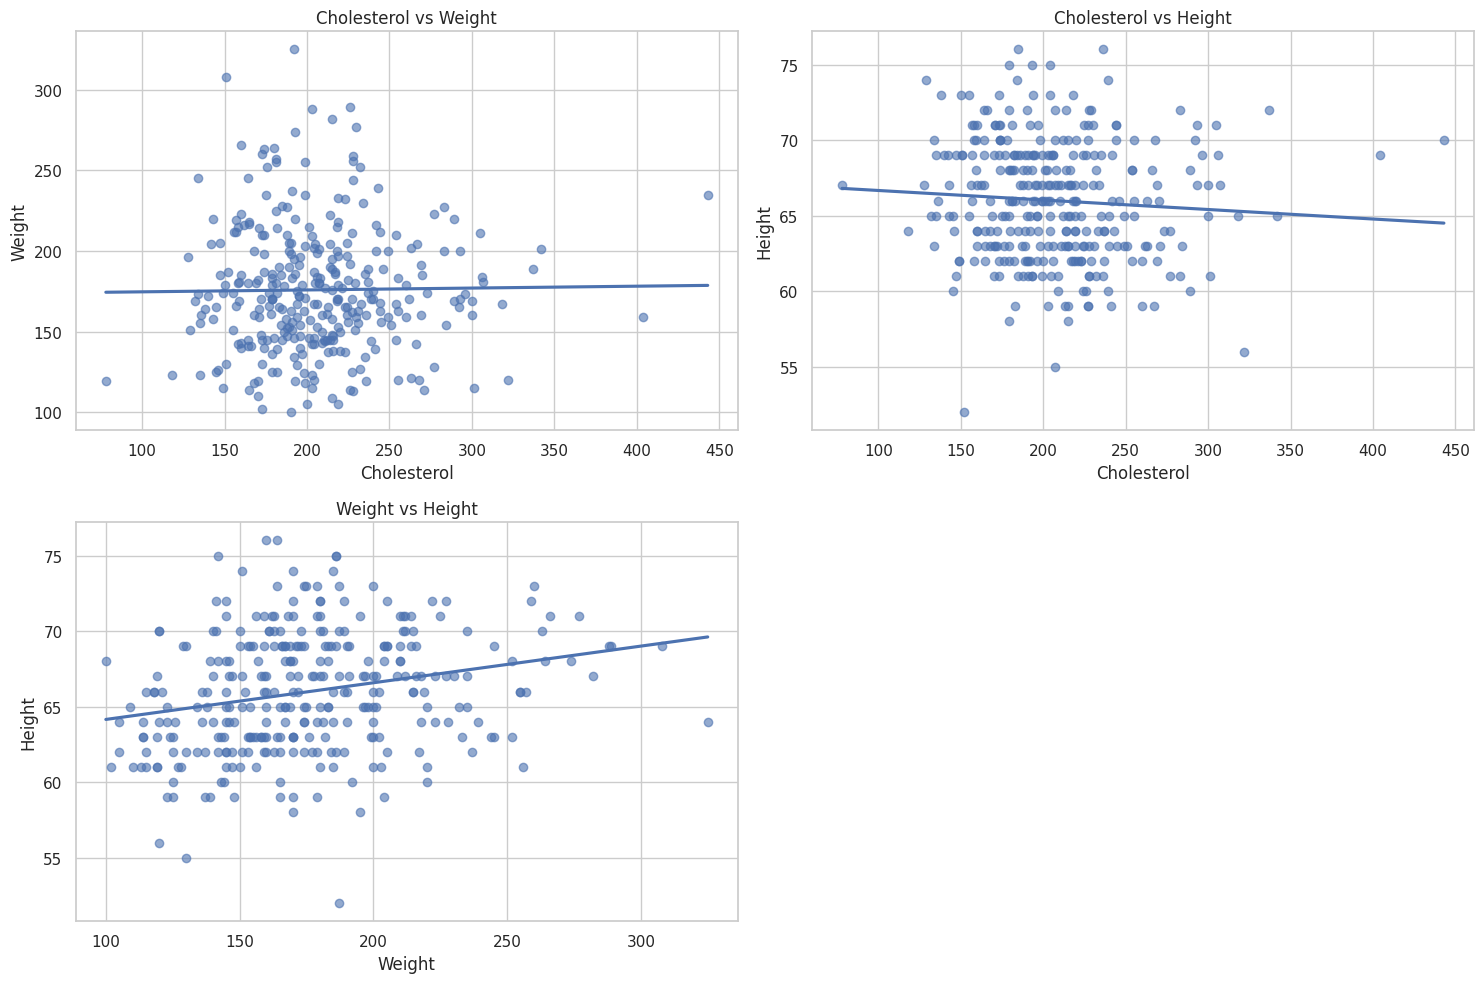

In [30]:
# Set up plots
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

# Create subplots for each pair
for i, (col1, col2) in enumerate(pairs, start=1):
    plt.subplot(2, 2, i)

    # Scatter plot with regression line
    sns.regplot(x=data[col1], y=data[col2], ci=None, scatter_kws={'alpha': 0.6})

    # Add titles and labels
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

# Adjust layout and display
plt.tight_layout()
plt.show()

7.	Comment the correlation coefficients obtained.

### Comments on the Correlation Coefficients:

#### 1. **Cholesterol & Weight**:
   - **Correlation Coefficient (0.013)**: The value is very close to 0, indicating **no significant linear relationship** between cholesterol levels and weight.
   - **Interpretation**: Changes in cholesterol levels do not appear to be related to changes in weight.

#### 2. **Cholesterol & Height**:
   - **Correlation Coefficient (-0.071)**: The slightly negative value indicates a **very weak and negligible inverse linear relationship** between cholesterol levels and height.
   - **Interpretation**: Any apparent association between cholesterol and height is likely due to random variations rather than a true relationship.

#### 3. **Weight & Height**:
   - **Correlation Coefficient (0.240)**: This is a **weak positive correlation**, suggesting a modest tendency for taller individuals to have higher weights.
   - **Interpretation**: While there is a visible trend, the relationship between weight and height is not strong enough to make precise predictions.

---

### Summary:
- None of the variables demonstrate a **strong correlation** with one another, indicating that the data does not exhibit significant linear relationships for these pairs.
- The weak positive correlation between weight and height aligns with expectations, as taller individuals often weigh more, but the strength of this relationship is limited.
- Cholesterol appears to have no meaningful relationship with either weight or height, suggesting independent variability in cholesterol levels.

8. Male class and Female class separately

In [35]:
def analyze_by_gender(subset_data, gender_label):
    print(f"\n--- Analysis for {gender_label} Class ---")
    for col1, col2 in pairs:
        correlation = subset_data[col1].corr(subset_data[col2])  # Correlation coefficient
        covariance = subset_data[[col1, col2]].cov().iloc[0, 1]  # Covariance

        # Display results
        print(f"\nAnalysis for {col1} & {col2}:")
        print(f"  Correlation Coefficient: {correlation:.3f}")
        print(f"  Covariance: {covariance:.3f}")

def plot_analysis_by_gender(subset_data, gender_label):
    plt.figure(figsize=(15, 10))
    for i, (col1, col2) in enumerate(pairs, start=1):
        plt.subplot(2, 2, i)
        sns.regplot(x=col1, y=col2, data=subset_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
        plt.title(f"{gender_label}: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
    plt.tight_layout()
    plt.show()


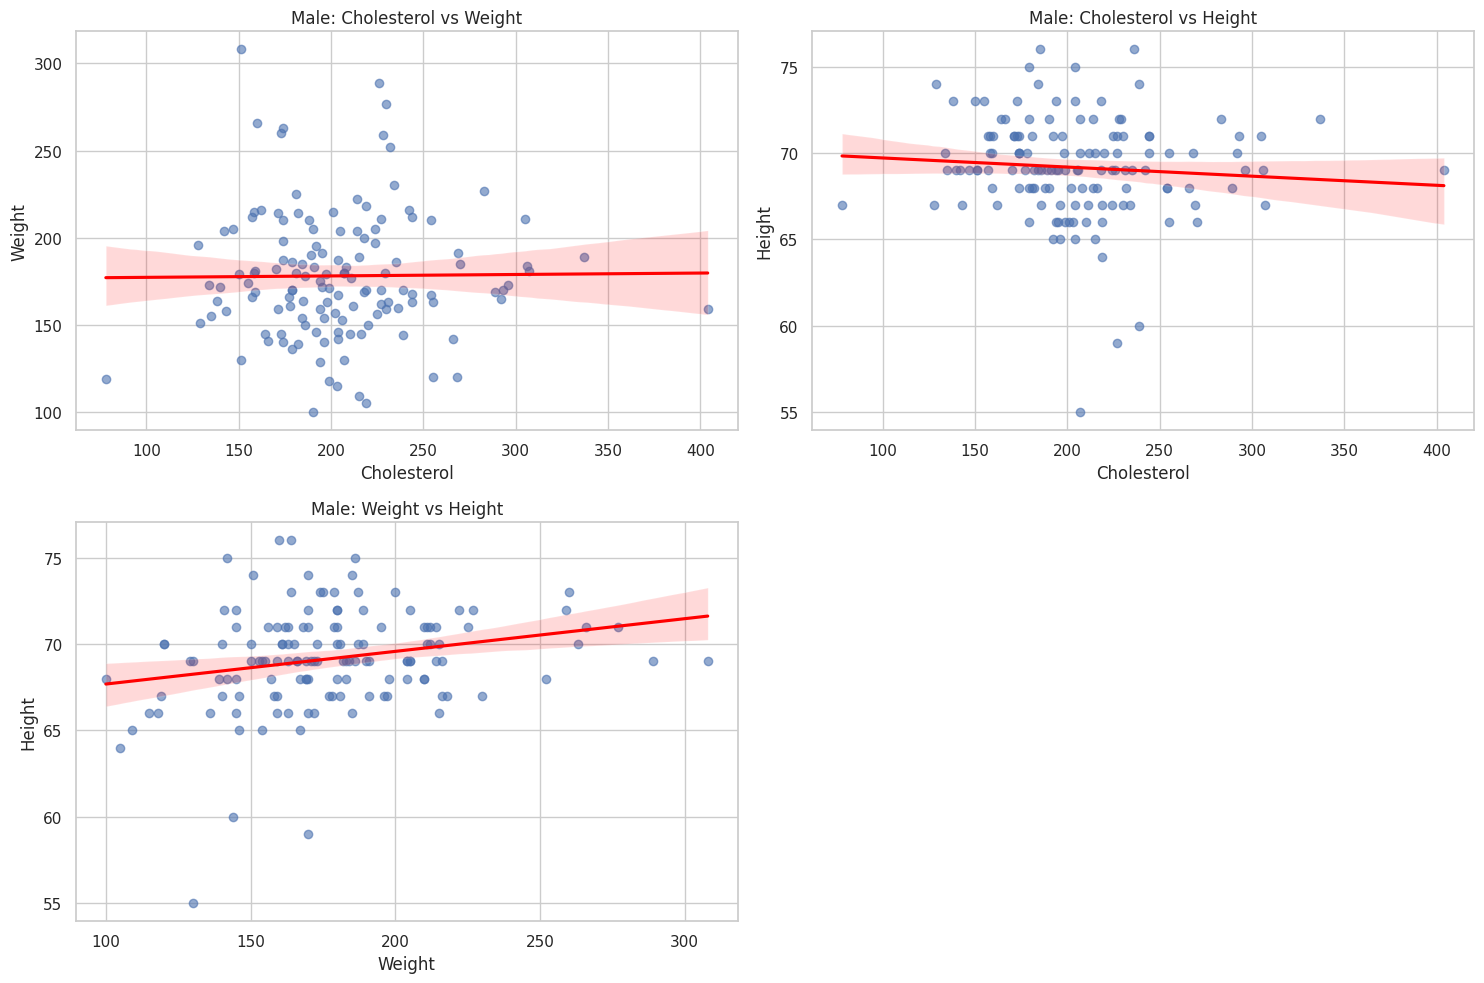


--- Analysis for Male Class ---

Analysis for Cholesterol & Weight:
  Correlation Coefficient: 0.010
  Covariance: 17.303

Analysis for Cholesterol & Height:
  Correlation Coefficient: -0.082
  Covariance: -11.118

Analysis for Weight & Height:
  Correlation Coefficient: 0.234
  Covariance: 25.155


In [39]:
plot_analysis_by_gender(male_data, "Male")
analyze_by_gender(male_data, "Male")


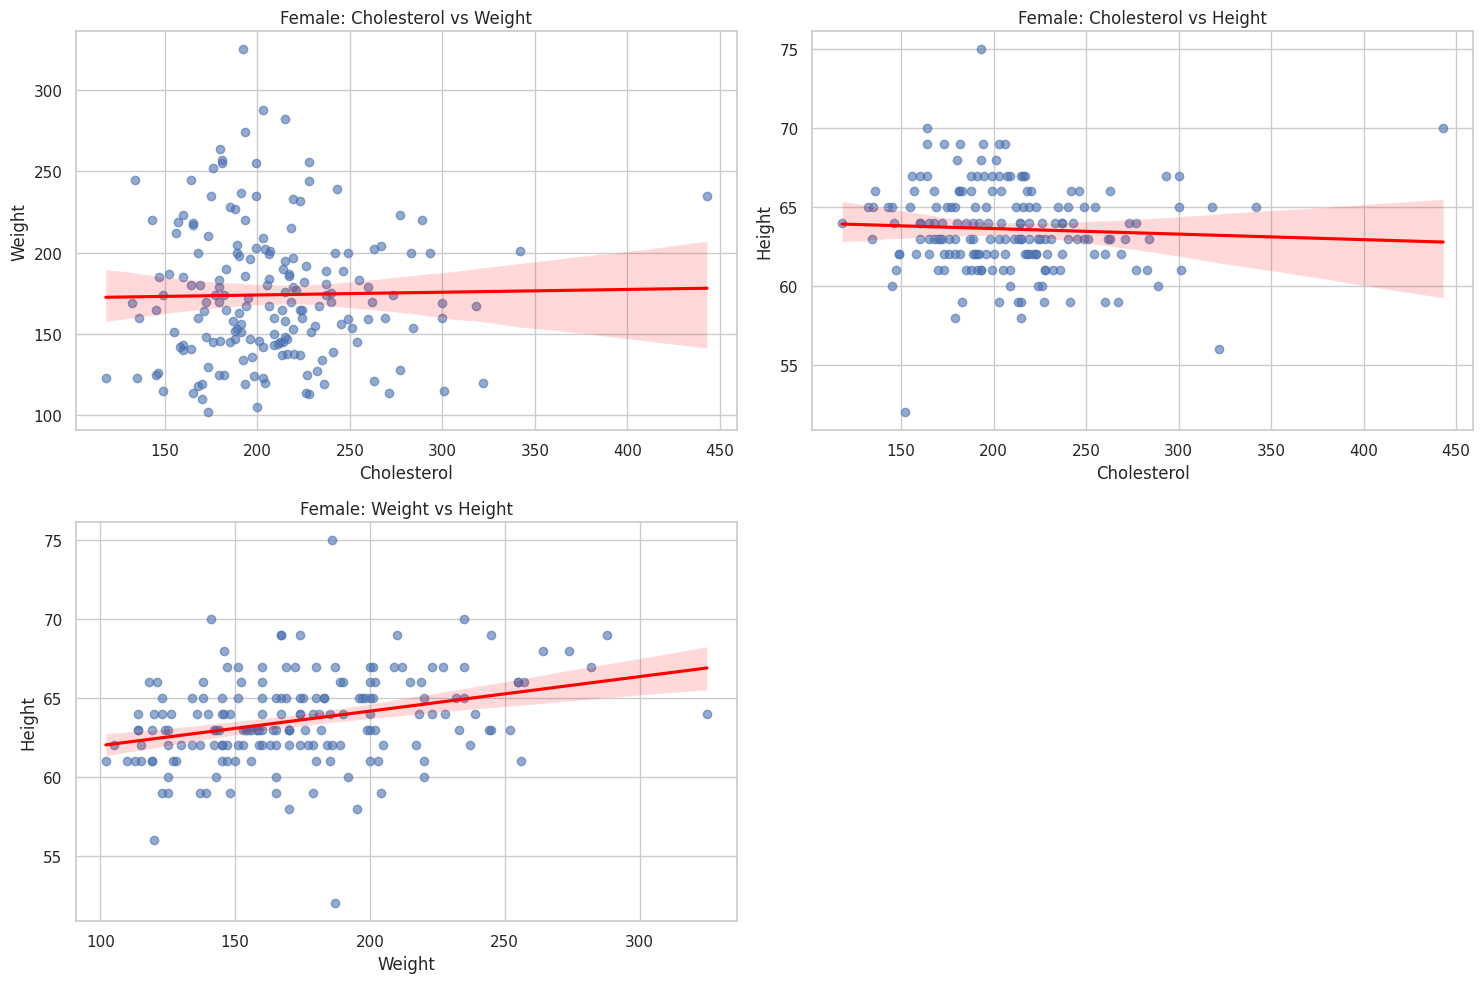


--- Analysis for Female Class ---

Analysis for Cholesterol & Weight:
  Correlation Coefficient: 0.018
  Covariance: 33.445

Analysis for Cholesterol & Height:
  Correlation Coefficient: -0.055
  Covariance: -6.876

Analysis for Weight & Height:
  Correlation Coefficient: 0.319
  Covariance: 37.581


In [40]:
plot_analysis_by_gender(female_data, "Female")
analyze_by_gender(female_data, "Female")


9.	Use a linear regression model for the following case:

In [44]:
def linear_regression_and_plot(x, y, x_label, y_label, title):
    # Reshape x for regression model
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Linear regression model
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Correlation coefficient between actual and predicted values
    correlation = np.corrcoef(y, y_pred)[0, 1]

    # Display results
    print(f"\nLinear Regression Analysis: {title}")
    print(f"  Coefficient of Determination (R²): {model.score(x, y):.3f}")
    print(f"  Correlation Coefficient: {correlation:.3f}")

    # Plot actual vs predicted with regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Actual Data')
    plt.plot(x, y_pred, color='red', label='Regression Line')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, y_pred

- Predict W from H, call it WfH , compute the correlation coefficient between W and WfH

Case 1: Predict Weight from Height (WfH)

Linear Regression Analysis: Linear Regression: Weight vs Height (WfH)
  Coefficient of Determination (R²): 0.057
  Correlation Coefficient: 0.240


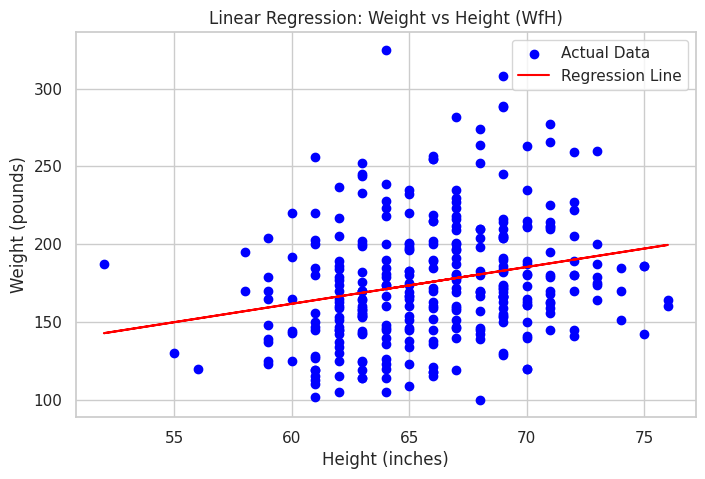

In [45]:
print("Case 1: Predict Weight from Height (WfH)")
model_wfh, predicted_wfh = linear_regression_and_plot(
    data['Height'], data['Weight'], "Height (inches)", "Weight (pounds)",
    "Linear Regression: Weight vs Height (WfH)"
)

- Predict D from C, call it DfC , compute the correlation coefficient between D and DfC


Case 2: Predict Diabetes from Cholesterol (DfC)

Linear Regression Analysis: Linear Regression: Diabetes vs Cholesterol (DfC)
  Coefficient of Determination (R²): 0.044
  Correlation Coefficient: 0.209


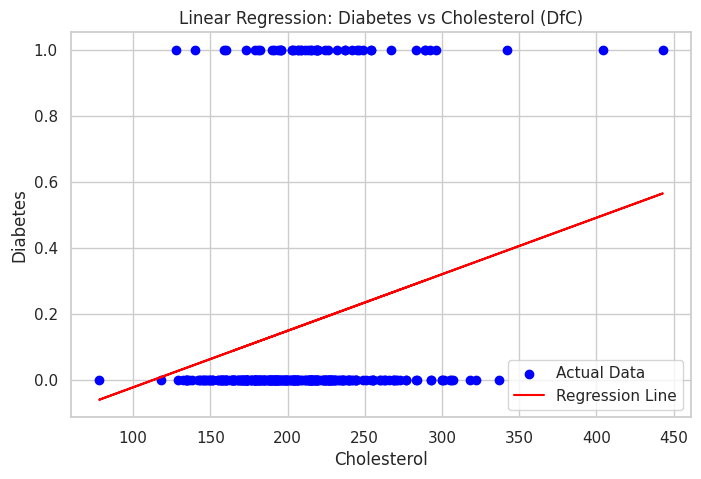

In [46]:
print("\nCase 2: Predict Diabetes from Cholesterol (DfC)")
model_dfc, predicted_dfc = linear_regression_and_plot(
    data['Cholesterol'], data['Diabetes'], "Cholesterol", "Diabetes",
    "Linear Regression: Diabetes vs Cholesterol (DfC)"
)

10.	Use any machine learning model (such as the Bayesian or decision tress) with the training data to predict the class D from the remaining test data (20%).

In [53]:
test_data.head()

,Patient_Number,Cholesterol,Gender,Height,Weight,Observation
0,134,138,female,60,138,319
1,6,170,female,64,161,320
2,313,180,male,69,169,321
3,234,181,male,71,320,322
4,282,115,male,69,200,323


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_Number  78 non-null     int64 
 1   Cholesterol     78 non-null     int64 
 2   Gender          78 non-null     object
 3   Height          78 non-null     int64 
 4   Weight          78 non-null     int64 
 5   Observation     78 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.8+ KB
